In [1]:
import pandas as pd
import json

In [2]:
df_queue = pd.read_json("./single_request_without_queue.json", lines=True)

In [3]:
def filter_df(x):
    return x['metric'] == 'completion_time' and 'tags' in x['data']

In [4]:
df_q_completion = df_queue[df_queue.apply(filter_df, axis=1)]

In [5]:
df_q_completion['start'] = df_q_completion.apply(lambda x: x['data']['tags']['start'], axis=1)
df_q_completion['start_success'] = df_q_completion.apply(lambda x: x['data']['tags']['startSuccess'], axis=1)
df_q_completion['end'] = df_q_completion.apply(lambda x: x['data']['tags']['end'], axis=1)
df_q_completion['vu'] = df_q_completion.apply(lambda x: x['data']['tags']['vu'], axis=1)

<ipython-input-5-5b100cec62cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start'] = df_q_completion.apply(lambda x: x['data']['tags']['start'], axis=1)
<ipython-input-5-5b100cec62cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start_success'] = df_q_completion.apply(lambda x: x['data']['tags']['startSuccess'], axis=1)
<ipython-input-5-5b100cec62cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [6]:
df_q_completion

,type,data,metric,start,start_success,end,vu
29,Point,"{'time': '2021-04-22T16:15:59.28797+07:00', 'v...",completion_time,1619082959235,1619082959235,1619082959284,212
44,Point,"{'time': '2021-04-22T16:15:59.345478+07:00', '...",completion_time,1619082959234,1619082959234,1619082959345,68
58,Point,"{'time': '2021-04-22T16:15:59.647974+07:00', '...",completion_time,1619082959239,1619082959239,1619082959520,126
72,Point,"{'time': '2021-04-22T16:15:59.65637+07:00', 'v...",completion_time,1619082959236,1619082959236,1619082959656,15
130,Point,"{'time': '2021-04-22T16:16:01.411083+07:00', '...",completion_time,1619082959244,1619082959244,1619082961407,79
...,...,...,...,...,...,...,...
199038,Point,"{'time': '2021-04-22T16:18:23.178681+07:00', '...",completion_time,1619082960981,1619083096852,1619083103172,2322
199052,Point,"{'time': '2021-04-22T16:18:23.280822+07:00', '...",completion_time,1619082962667,1619083088837,1619083103276,906
199066,Point,"{'time': '2021-04-22T16:18:23.349572+07:00', '...",completion_time,1619082961306,1619083088801,1619083103345,441
199080,Point,"{'time': '2021-04-22T16:18:23.356772+07:00', '...",completion_time,1619082963016,1619083088809,1619083103356,2868


In [7]:
min_start = df_q_completion['start'].min()
min_start

'1619082959228'

In [8]:
df_q_completion['start'] = df_q_completion['start'].apply(lambda x: int(x) - int(min_start))
df_q_completion['start_success'] = df_q_completion['start_success'].apply(lambda x: int(x) - int(min_start))
df_q_completion['end'] = df_q_completion['end'].apply(lambda x: int(x) - int(min_start))

<ipython-input-8-98c94dffd5de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start'] = df_q_completion['start'].apply(lambda x: int(x) - int(min_start))
<ipython-input-8-98c94dffd5de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start_success'] = df_q_completion['start_success'].apply(lambda x: int(x) - int(min_start))
<ipython-input-8-98c94dffd5de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [9]:
df_q_completion

,type,data,metric,start,start_success,end,vu
29,Point,"{'time': '2021-04-22T16:15:59.28797+07:00', 'v...",completion_time,7,7,56,212
44,Point,"{'time': '2021-04-22T16:15:59.345478+07:00', '...",completion_time,6,6,117,68
58,Point,"{'time': '2021-04-22T16:15:59.647974+07:00', '...",completion_time,11,11,292,126
72,Point,"{'time': '2021-04-22T16:15:59.65637+07:00', 'v...",completion_time,8,8,428,15
130,Point,"{'time': '2021-04-22T16:16:01.411083+07:00', '...",completion_time,16,16,2179,79
...,...,...,...,...,...,...,...
199038,Point,"{'time': '2021-04-22T16:18:23.178681+07:00', '...",completion_time,1753,137624,143944,2322
199052,Point,"{'time': '2021-04-22T16:18:23.280822+07:00', '...",completion_time,3439,129609,144048,906
199066,Point,"{'time': '2021-04-22T16:18:23.349572+07:00', '...",completion_time,2078,129573,144117,441
199080,Point,"{'time': '2021-04-22T16:18:23.356772+07:00', '...",completion_time,3788,129581,144128,2868


In [23]:
df_sampled = df_q_completion[:200] #.sample(n=100)

In [24]:
df_sampled_sorted = df_sampled.sort_values(by='start', ascending=False)

<BarContainer object of 200 artists>

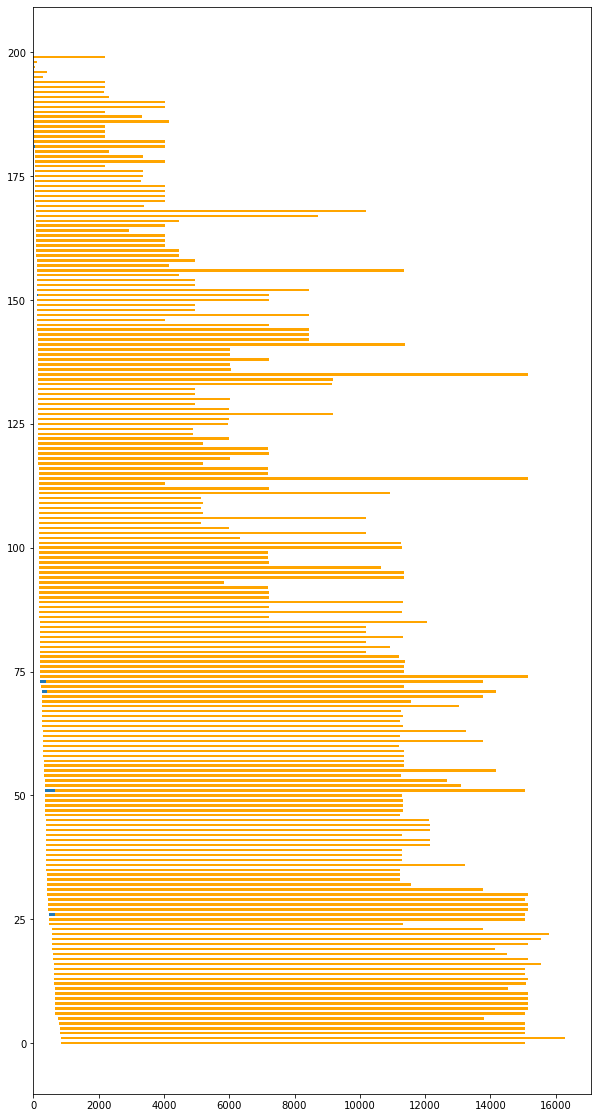

In [25]:
import matplotlib.pyplot as plt
import numpy as np


target_bars_start = df_sampled_sorted['start']
target_bars_start_success = df_sampled_sorted['start_success']
target_bars_end = df_sampled_sorted['end']
N = len(target_bars_end)
ind = np.arange(N)

plt.subplots(figsize=(10, 20))
plt.barh(ind, target_bars_end, 0.5, color='orange')
plt.barh(ind, target_bars_start_success, 0.5)
plt.barh(ind, target_bars_start, 0.5, color='white')